### CNN

#### Train a CNN on the MNIST data

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Reshape X and y data

In [3]:
X_train_reshaped = np.expand_dims(X_train, axis=3) # equal to X_train.reshape(60000, 28, 28, 1)
# we explicitely state that there is one color channel
X_test_reshaped = np.expand_dims(X_test, axis=3)
y_train_reshaped = to_categorical(y_train)
y_test_reshaped = to_categorical(y_test)

#### Instantiate the Model

In [10]:
K.clear_session() # clears the session and deletes old layers

model = Sequential([
    Conv2D(filters=32,             # aka neurons, kernels, base 2 numbers convention
           kernel_size=(3,3),      # (3,3) kernel has 9+1 parameters
                                   # (5,5) kernel has 25+1 parameters
           strides=(2,2),          # steps, bigger -> smaller output
                                   # default (1,1) and use MaxPool afterwards
           activation='relu',      # ReLU great first choice, ELU for optimization
           input_shape=(28,28,1)), # what is the shape of my numpy array X_train_reshaped
                                   # assumes that there is one or many color channel,
                                   # you have to tell it how many
        BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        BatchNormalization(),
    Conv2D(filters=10, kernel_size=(3,3), strides=(2,2), activation='relu'),
                                   # for the second conv layer you do not set input shape
    Flatten(),
    Dropout(0.5),
        BatchNormalization(),
    Dense(10, activation='softmax')])

#### Model Summary
- None is a placeholder for # of data points
- last digit of output shape is # of filters
- last dense layer adds additional # of parameters for each neuron's bias

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 10)          2890      
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dropout (Dropout)            (None, 40)                0

#### Compile the Model

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train_reshaped,y_train_reshaped, epochs=20, batch_size=500, verbose=1, validation_data=(X_test_reshaped, y_test_reshaped), validation_split=0.1)

Epoch 1/20
108/108 [==============================] - 3s 24ms/step - loss: 0.5789 - accuracy: 0.8126 - val_loss: 0.4584 - val_accuracy: 0.8513
Epoch 2/20
108/108 [==============================] - 3s 24ms/step - loss: 0.1980 - accuracy: 0.9394 - val_loss: 0.0861 - val_accuracy: 0.9730
Epoch 3/20
108/108 [==============================] - 3s 23ms/step - loss: 0.1484 - accuracy: 0.9536 - val_loss: 0.0739 - val_accuracy: 0.9775
Epoch 4/20
108/108 [==============================] - 3s 24ms/step - loss: 0.1314 - accuracy: 0.9581 - val_loss: 0.0786 - val_accuracy: 0.9745
Epoch 5/20
108/108 [==============================] - 3s 24ms/step - loss: 0.1200 - accuracy: 0.9627 - val_loss: 0.0633 - val_accuracy: 0.9793
Epoch 6/20
108/108 [==============================] - 3s 24ms/step - loss: 0.1120 - accuracy: 0.9647 - val_loss: 0.0583 - val_accuracy: 0.9810
Epoch 7/20
108/108 [==============================] - 3s 23ms/step - loss: 0.1080 - accuracy: 0.9659 - val_loss: 0.0573 - val_accuracy: 0.9823

#### Plot train and test data

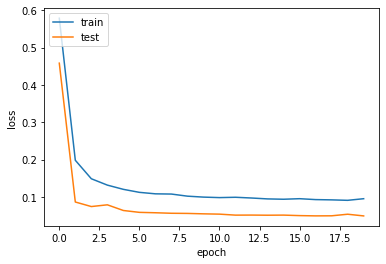

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

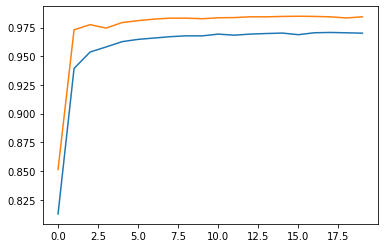

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])